In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras import layers, Sequential
import random


In [6]:
absolute_path = os.path.dirname(os.path.dirname(os.getcwd()))
path = absolute_path + "/raw_data"
path

'/home/christophelanson/code/christophelanson/icangetyoursmile/raw_data'

In [7]:
number = 10
str(number).zfill(4)

'0010'

In [8]:
def get_dataset(path, sample_size=500, image_size=(64,64), random_seed=1):
    """
    get a dataset of images of required size, randomly selected
    returns X (masked images), y (unmasked images of the same faces), and a sample test set of 5 images
    path to data : ..../raw_data
    the function then completes the path by adding : 64x64/Mask or No_mask (or 256x256/Mask etc.)
    """
    path = f'{path}/{image_size[0]}x{image_size[1]}/'
    print(f'Loading data from {path}...')
    random.seed(random_seed)
    data_size = sample_size
    X = []
    y = []
    X_test = []
    for number in range(data_size):
        rand_img_nb = random.randint(0,9999)
        no_mask_path = f'{path}No_mask/seed{str(rand_img_nb).zfill(4)}.png'
        no_mask_im = np.asarray(Image.open(no_mask_path)).tolist()
        mask_path = f'{path}Mask/with-mask-default-mask-seed{str(rand_img_nb).zfill(4)}.png'
        mask_im = np.asarray(Image.open(mask_path)).tolist()
        X.append(mask_im)
        y.append(no_mask_im)
    for number in range(5):
        rand_img_nb = random.randint(0,9999)
        mask_path = f'{path}Mask/with-mask-default-mask-seed{str(rand_img_nb).zfill(4)}.png'
        mask_im = np.asarray(Image.open(mask_path)).tolist()
        X_test.append(mask_im)
    X=np.asarray(X)
    y=np.asarray(y)
    X_test=np.asarray(X_test)
    print('Done')
    print(f'X shape : {X.shape}')
    print(f'y shape : {y.shape}')
    print(f'X_test shape : {X_test.shape}')
    return X, y, X_test

In [9]:
X, y, X_test = get_dataset(path, sample_size= 200, image_size=(64,64), random_seed=5)

Loading data from /home/christophelanson/code/christophelanson/icangetyoursmile/raw_data/64x64/...
Done
X shape : (200, 64, 64, 3)
y shape : (200, 64, 64, 3)
X_test shape : (5, 64, 64, 3)


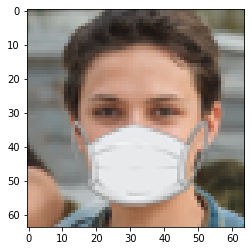

In [10]:
plt.imshow(X_test[0])

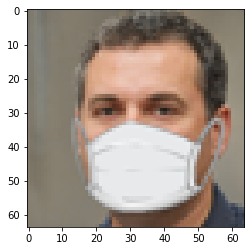

In [11]:
plt.imshow(X[20])

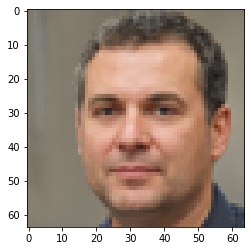

In [12]:
plt.imshow(y[20])

In [13]:
from icangetyoursmile.models import unet

In [14]:
model = unet(input_size=(64,64,3))

2022-03-04 00:04:58.165497: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-04 00:04:58.165642: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-04 00:04:58.165689: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (HP-CL): /proc/driver/nvidia/version does not exist
2022-03-04 00:04:58.166387: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
from icangetyoursmile.custom_callbacks import CustomCallback
image_log = dict()
save_predict = CustomCallback(X_test, image_log)

In [16]:
results = model.fit(X, y, batch_size=8, epochs=10, use_multiprocessing=True, callbacks=save_predict)

Epoch 1/10
25/25 [==============================] - 4s 91ms/step - loss: 10380.7676
Epoch 2/10
25/25 [==============================] - 2s 64ms/step - loss: 4635.5000
Epoch 3/10
25/25 [==============================] - 2s 65ms/step - loss: 3451.1689
Epoch 4/10
25/25 [==============================] - 2s 66ms/step - loss: 2971.6506
Epoch 5/10
25/25 [==============================] - 2s 63ms/step - loss: 2645.0300
Epoch 6/10
25/25 [==============================] - 2s 64ms/step - loss: 2397.3035
Epoch 7/10
25/25 [==============================] - 2s 62ms/step - loss: 2180.2390
Epoch 8/10
25/25 [==============================] - 2s 62ms/step - loss: 1978.6360
Epoch 9/10
25/25 [==============================] - 2s 61ms/step - loss: 1795.9240
Epoch 10/10
25/25 [==============================] - 2s 60ms/step - loss: 1644.3427


In [17]:
y_pred = model.predict(X_test).astype(np.uint8)

In [18]:
def plot_results(X_test, y_pred):
    plt.figure(figsize=(20,10))
    nb_graphs = len(X_test)
    for graph_nb in range(nb_graphs):
        plt.subplot(2,nb_graphs, graph_nb+1)
        plt.imshow(X_test[graph_nb])
        plt.subplot(2,nb_graphs, graph_nb +1 +nb_graphs)
        plt.imshow(y_pred[graph_nb])

In [19]:
import pickle

In [20]:
with open('image_log.pickle', 'wb') as handle:
    pickle.dump(image_log, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [21]:
with open('image_log.pickle', 'rb') as handle:
    image_log2 = pickle.load(handle)

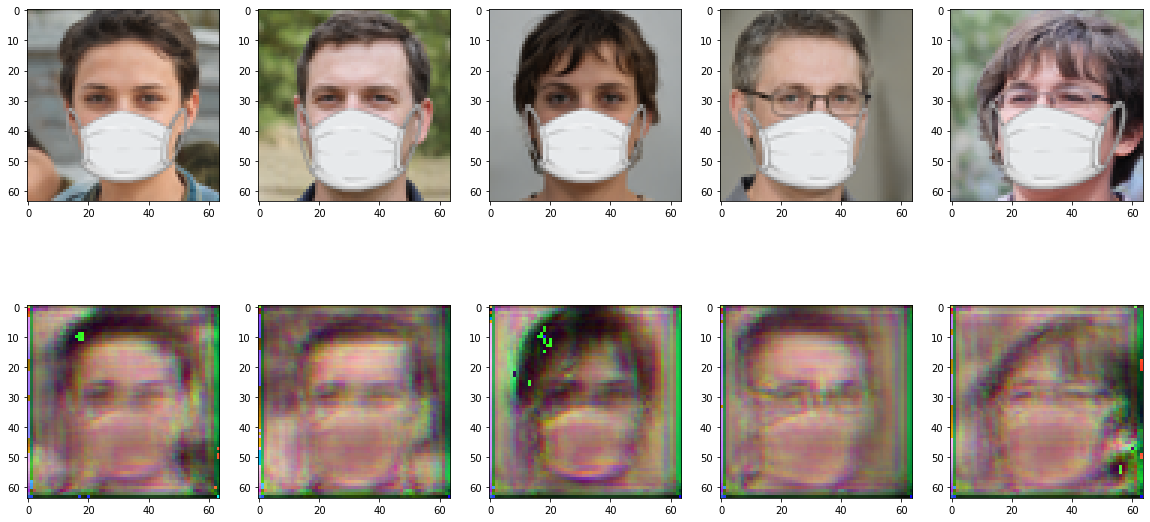

In [22]:
plot_results(X_test, y_pred);

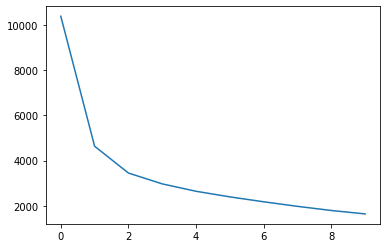

In [23]:
plt.plot(results.history['loss'])

<IPython.core.display.Javascript object>


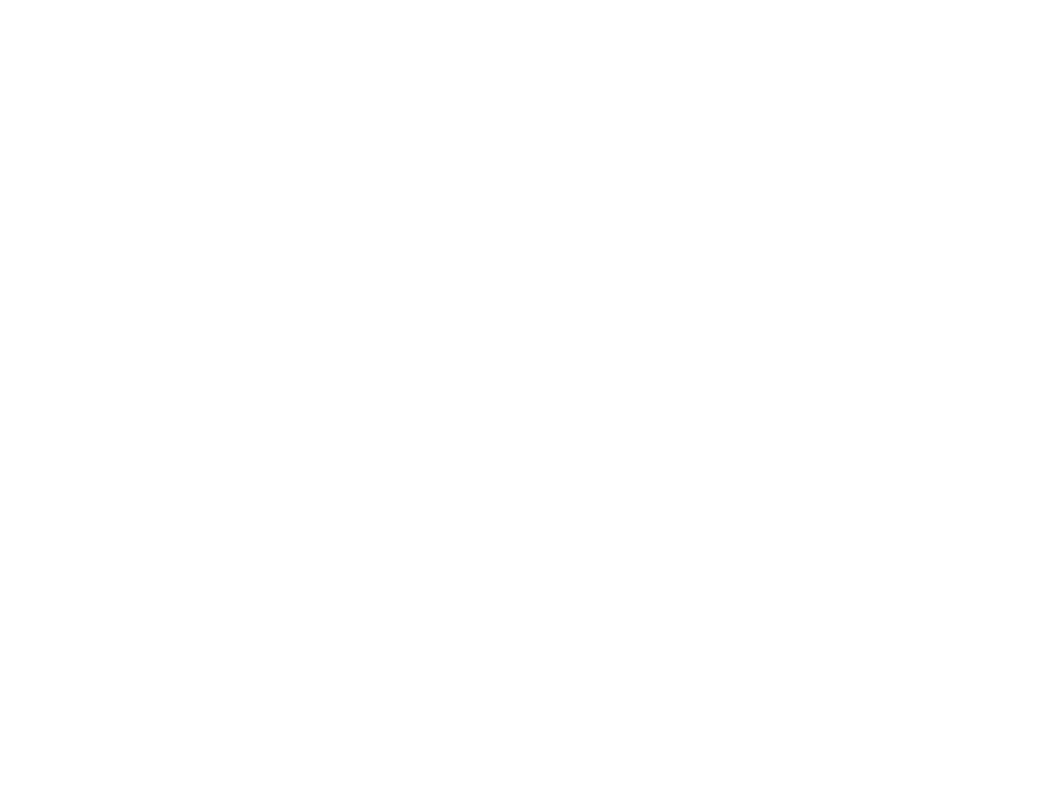

In [34]:
image_nb=1
fig = plt.gcf()
fig.show()
fig.canvas.draw()
for i in range(int(len(image_log)/10)):
    plt.imshow(image_log[i][image_nb])
    plt.pause(0.05)
    fig.canvas.draw()
    

<IPython.core.display.Javascript object>


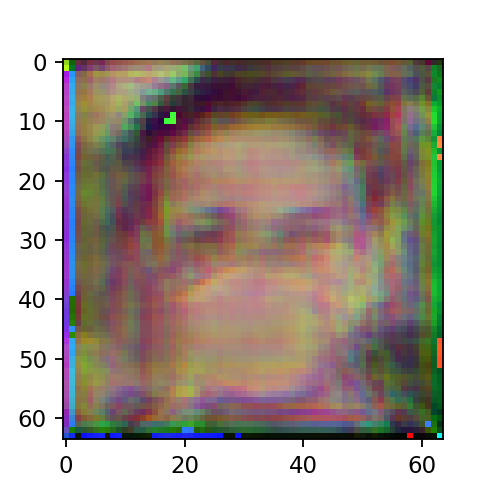

In [33]:
%matplotlib notebook
import matplotlib.animation as animation
fig = plt.figure(figsize=(3,3))
image_nb = 0
frames = []
for i in range(int(len(image_log))):
    frames.append([plt.imshow(image_log[5*i][image_nb],animated=True)])
ani = animation.ArtistAnimation(fig, frames, interval=1000, repeat_delay=1000,)
plt.show()

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)
